In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_cost` function below:

In [4]:
def compute_loss(y, tx, w):

    """Calculate the loss using either MSE

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    error = y - np.dot(tx, w)
    return np.dot(error.T, error)/len(error)

# 2. Grid Search

Fill in the function `grid_search()` below:

In [5]:
from costs import *

def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.
        
    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    for i in range(len(grid_w0)):
        for j in range(len(grid_w1)):
            losses[i,j] = compute_loss_mse(y, tx, np.array([grid_w0[i], grid_w1[j]]).T)
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=15.558703368609525, w0*=72.72727272727272, w1*=13.636363636363626, execution time=2.125 seconds


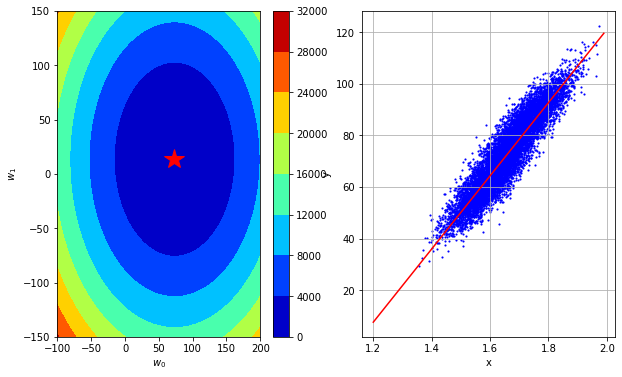

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    error = y - np.dot(tx, w)
    return -np.dot(tx.T, error)/len(y)

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        #update w by gradient
        w = w - gamma*compute_gradient(y, tx, w)
        
        print("GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=2792.236712759168, w0=51.3057454014736, w1=9.435798704492266
GD iter. 1/49: loss=265.3024621089608, w0=66.69746902191571, w1=12.266538315839991
GD iter. 2/49: loss=37.878379550441274, w0=71.31498610804834, w1=13.115760199244328
GD iter. 3/49: loss=17.410212120174478, w0=72.70024123388814, w1=13.37052676426563
GD iter. 4/49: loss=15.568077051450457, w0=73.11581777164007, w1=13.446956733772023
GD iter. 5/49: loss=15.402284895265295, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=15.38736360120863, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=15.386020684743528, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
GD iter. 9/49: loss=15.385888944638301, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=15.3858879656522, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=15.385887877543452, w0=73.29388305071, w1=13.479705271317192
GD i

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [11]:
import random

def compute_stoch_gradient(y, tx, w, n = random.randint(1, len(y))):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    for i,j in batch_iter(y, tx, n):
        y = i
        tx = j
     
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        #update w by gradient
        w = w - gamma*compute_stoch_gradient(y, tx, w, batch_size)

        print("SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2792.236712759168, w0=5.6571520616619155, w1=-6.1461263773865875
SGD iter. 1/49: loss=2495.3389864017295, w0=13.806223421249761, w1=1.2537733855133348
SGD iter. 2/49: loss=1859.5158219129305, w0=18.357106015870393, w1=-3.9861399417088057
SGD iter. 3/49: loss=1676.9407628438412, w0=24.005097909703878, w1=-5.018224190850016
SGD iter. 4/49: loss=1401.1668077814472, w0=27.446084287336763, w1=-8.295749464415358
SGD iter. 5/49: loss=1303.4833698949053, w0=30.516016488641213, w1=-9.413232731542712
SGD iter. 6/49: loss=1192.403957127169, w0=39.63962750345337, w1=15.427570938000533
SGD iter. 7/49: loss=583.5887333436997, w0=42.15378820839348, w1=15.624089639350792
SGD iter. 8/49: loss=502.5390310112555, w0=44.833387142127734, w1=13.301616680466447
SGD iter. 9/49: loss=420.4027691757148, w0=47.109412561350844, w1=14.641643652568037
SGD iter. 10/49: loss=358.87519727249844, w0=50.46490867900723, w1=19.143251739830934
SGD iter. 11/49: loss=292.00565125066606, w0=53.61229841869

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [14]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [15]:
y.shape, tx.shape

((202,), (202, 2))

In [16]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2869.8351145358533, w0=49.6344298147335, w1=12.646294072764611
SGD iter. 1/49: loss=365.72396616513697, w0=61.69550357304975, w1=5.3538341876094195
SGD iter. 2/49: loss=158.604887195384, w0=63.44135488580108, w1=4.367585841432458
SGD iter. 3/49: loss=144.6179650166825, w0=78.87748799765126, w1=30.131171206378358
SGD iter. 4/49: loss=259.83113629388214, w0=82.94798959474687, w1=25.269603343859806
SGD iter. 5/49: loss=206.67302445407185, w0=68.46945576248551, w1=13.018323855749244
SGD iter. 6/49: loss=83.5684872600801, w0=71.26283291338689, w1=10.608971935272132
SGD iter. 7/49: loss=69.95537187544296, w0=84.66909743179055, w1=33.22351502406822
SGD iter. 8/49: loss=368.29185391120683, w0=202.70414001091686, w1=-433.90854594626404
SGD iter. 9/49: loss=107326.91672357188, w0=360.00708436905165, w1=-312.34549302289656
SGD iter. 10/49: loss=93234.00386427483, w0=396.76726800117933, w1=-274.27138541665306
SGD iter. 11/49: loss=92833.23894920178, w0=65.98095059107004, w1=-1

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses, gd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [18]:
def compute_loss_mae(y, tx, w):

    """Calculate the loss using MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    error = y - np.dot(tx, w)
    return np.sum(np.abs(error))/len(error)

def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    error = y - np.dot(tx, w)
    return -np.dot(tx.T, np.sign(error))/len(error)
    

In [19]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD 
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        #update w by gradient
        w = w - gamma*compute_subgradient_mae(y, tx, w)
        
        print("SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [20]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(
    y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=2869.8351145358533, w0=0.7, w1=8.756471895211877e-16
SubGD iter. 1/499: loss=2818.2326504374037, w0=1.4, w1=1.7512943790423754e-15
SubGD iter. 2/499: loss=2767.1201863389556, w0=2.0999999999999996, w1=2.626941568563563e-15
SubGD iter. 3/499: loss=2716.4977222405073, w0=2.8, w1=3.502588758084751e-15
SubGD iter. 4/499: loss=2666.365258142059, w0=3.5, w1=4.378235947605939e-15
SubGD iter. 5/499: loss=2616.722794043611, w0=4.2, w1=5.253883137127127e-15
SubGD iter. 6/499: loss=2567.5703299451625, w0=4.9, w1=6.1295303266483146e-15
SubGD iter. 7/499: loss=2518.9078658467133, w0=5.6000000000000005, w1=7.0051775161695025e-15
SubGD iter. 8/499: loss=2470.7354017482653, w0=6.300000000000001, w1=7.88082470569069e-15
SubGD iter. 9/499: loss=2423.0529376498166, w0=7.000000000000001, w1=8.756471895211878e-15
SubGD iter. 10/499: loss=2375.8604735513677, w0=7.700000000000001, w1=9.632119084733065e-15
SubGD iter. 11/499: loss=2329.1580094529195, w0=8.4, w1=1.0507766274254253e-14
S

In [21]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses, subgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [22]:
def compute_stoch_subgradient_mae(y, tx, w, n = random.randint(1, len(y))):
    """Compute a stochastic gradient at w from just few examples n and their corresponding y_n labels.
        
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.
        
    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """
    for i,j in batch_iter(y, tx, n):
        y = i
        tx = j
     
    return compute_subgradient_mae(y, tx, w)

In [23]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic SubGradient Descent algorithm (SubSGD).
            
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize
        
    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD 
    """
    
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        loss = compute_loss_mae(y, tx, w)
        
        # store w and loss
        ws.append(w)
        losses.append(loss)
        
        #update w by gradient
        w = w - gamma*compute_stoch_subgradient_mae(y, tx, w)
        
        print("SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [24]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=74.06780585492638, w0=0.7, w1=-0.00059174628149748
SubSGD iter. 1/499: loss=73.36780585492637, w0=1.4, w1=0.009882160628060771
SubSGD iter. 2/499: loss=72.66780585492639, w0=2.0999999999999996, w1=0.012786726223826133
SubSGD iter. 3/499: loss=71.96780585492638, w0=2.8, w1=0.006734344735497178
SubSGD iter. 4/499: loss=71.26780585492638, w0=3.5, w1=0.004122321453722827
SubSGD iter. 5/499: loss=70.56780585492638, w0=4.2, w1=-0.003130452084377155
SubSGD iter. 6/499: loss=69.86780585492637, w0=4.9, w1=-0.0058745054660320544
SubSGD iter. 7/499: loss=69.16780585492639, w0=5.6000000000000005, w1=0.02019676039950603
SubSGD iter. 8/499: loss=68.46780585492638, w0=6.300000000000001, w1=0.02955114814322502
SubSGD iter. 9/499: loss=67.76780585492638, w0=7.000000000000001, w1=0.06641999794963846
SubSGD iter. 10/499: loss=67.06780585492638, w0=7.700000000000001, w1=0.05190698963549237
SubSGD iter. 11/499: loss=66.36780585492637, w0=8.4, w1=0.03485577190264758
SubSGD iter. 12/

In [29]:
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses, subsgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>